# Input Data

In [0]:
from zipfile import ZipFile
from urllib.request import urlopen   
import pandas as pd
import os


URL = \
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

from io import BytesIO

z = urlopen(URL)
myzip = ZipFile(BytesIO(z.read())).extract('bank-full.csv')
pd.read_csv(myzip)


# # open and save the zip file onto computer
# url = urlopen(URL)
# output = open('zipFile.zip', 'wb')    # note the flag:  "wb"        
# output.write(url.read())
# output.close()


# zip_file = ZipFile('zipFile.zip')
# zip_file.infolist()
#dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
#       for text_file in zip_file.infolist()
#       if text_file.filename.endswith('.csv')}


# read the zip file as a pandas dataframe
#df,df1,df2 = pd.read_csv('zipFile.zip')   # pandas version 0.18.1 takes zip files       


# if keeping on disk the zip file is not wanted, then:
#os.remove(zipName)   # remove the copy of the zipfile on

In [6]:
# connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [72]:
DATA_DIRECTORY = "drive/My Drive/Colab Notebooks/"
df = pd.read_csv(os.path.join(DATA_DIRECTORY, 'banking_updated.csv'), nrows= None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1




**Input variables**:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target)**:

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [13]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
23027,46,admin.,divorced,high.school,no,no,no,cellular,apr,tue,345,2,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
27286,26,technician,married,professional.course,no,no,no,telephone,may,tue,205,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
12635,53,technician,married,professional.course,no,yes,no,cellular,may,tue,57,2,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
36025,61,housemaid,married,basic.4y,no,yes,no,telephone,oct,wed,238,2,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,0
3514,48,management,married,university.degree,unknown,no,no,cellular,nov,wed,52,3,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
13336,49,blue-collar,married,basic.4y,no,yes,no,cellular,may,fri,86,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0
36506,30,blue-collar,married,basic.9y,no,yes,no,cellular,jul,mon,332,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
15652,28,blue-collar,single,basic.9y,no,yes,no,telephone,may,fri,663,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
27139,36,admin.,married,university.degree,no,yes,no,cellular,sep,fri,355,1,999,0,nonexistent,-3.4,92.379,-29.8,0.773,5017.5,0
18863,38,blue-collar,single,basic.9y,no,yes,no,telephone,may,mon,179,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# FE-Feature Engineering


In [0]:
import os
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
cate_cols = [col for col in df.columns if df[col].dtype == 'object']

cons_cols = list(set(df.columns) - set(cate_cols))

In [0]:
def statistical_analyzing(df_input):
  """
  This function assits to expand Exploratory Data Analysis (EDA) is an open-ended 
  process where we calculate statistics and make figures to find trends, anomalies,
  patterns, or relationships within the data. The goal of EDA is to learn what our
  data can tell us. It generally starts out with a high level overview, 
  then narrows in to specific areas as we find intriguing areas of the data. """
  # check number of rows, cols
  no_rows = df_input.shape[0]
  no_cols = df_input.shape[1]
  print("No. observations:", no_rows )
  print("No. features:", no_cols )
  
  # checking type of features
  name = []
  cols_type = []
  for n,t in df_input.dtypes.iteritems():
    name.append(n)
    cols_type.append(t)
    
  # checking distinction (unique values) of features
  ls_unique = []
  for cname in df_input.columns:
    try:
      nunique = df_input[cname].nunique()
      pct_unique = nunique*100.0/ no_rows
      ls_unique.append("{} ({:0.2f}%)".format(nunique, pct_unique))
    except:
      ls_unique.append("{} ({:0.2f}%)".format(0,0))
      continue
  # checking missing values of features
  ls_miss = []
  for cname in df_input.columns:
    try:
      nmiss = df_input[cname].isnull().sum()
      pct_miss = nmiss*100.0/ no_rows
      ls_miss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))
    except:
      ls_miss.append("{} ({:0.2f}%)".format(0,0))
      continue 
      
  # checking zeros
  ls_zeros = []
  for cname in df_input.columns:
    try:
      nzeros = (df_input[cname] == 0).sum()
      pct_zeros = nzeros * 100.0/ no_rows
      ls_zeros.append("{} ({:0.2f}%)".fornat(nzeros, pct_zeros))
    except:
      ls_zeros.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # checking negative values
  ls_neg = []
  for cname in df_input.columns:
    try:
      nneg = (df_input[cname].astype("float")<0).sum()
      pct_neg =nneg * 100.0 / no_rows
      ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
    except:
      ls_neg.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # extracting the output
  data = {
      "name": name,
      "col_type": cols_type,
      "n_unique": ls_unique,
      "n_miss": ls_miss,
      "n_zeros":ls_zeros,
      "n_neg":ls_neg      
  }
  
  # statistical info
  df_stats = df_input.describe().transpose()
  ls_stats = []
  for stat in df_stats.columns:
    data[stat] = []
    for cname in df_input.columns:
      try:
        data[stat].append(df_stats.loc[cname, stat])
      except:
        data[stat].append(0.0)
        
  # take samples
  df_sample = df_input.sample(frac = .5).head().transpose()
  df_sample.columns = ["sample_{}".format(i) for i in range(5)]
  
  # repair the output
  col_ordered = ["name","col_type","n_unique","n_miss","n_zeros","n_neg",
                "25%","50%","75%","count","max","mean","min","std"]
  df_data = pd.DataFrame(data, columns = col_ordered).set_index("name")
  df_data = pd.concat([df_data, df_sample], axis = 1)
  
  return df_data   

In [12]:
statistical_analyzing(df)

No. observations: 41188
No. features: 21


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
age,int64,78 (0.19%),0 (0.00%),0 (0.00%),0 (0.00%),32.000,38.000,47.000,41188.0,98.000,40.024060,17.000,10.421250,60,36,33,30,41
job,object,12 (0.03%),0 (0.00%),0 (0.00%),0 (0.00%),0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,admin.,admin.,services,admin.,blue-collar
marital,object,4 (0.01%),0 (0.00%),0 (0.00%),0 (0.00%),0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,married,divorced,single,married,married
education,object,8 (0.02%),0 (0.00%),0 (0.00%),0 (0.00%),0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,high.school,high.school,basic.9y,high.school,basic.4y
default,object,3 (0.01%),0 (0.00%),0 (0.00%),0 (0.00%),0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,no,no,no,no,no
housing,object,3 (0.01%),0 (0.00%),0 (0.00%),0 (0.00%),0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,unknown,yes,yes,yes,yes
loan,object,3 (0.01%),0 (0.00%),0 (0.00%),0 (0.00%),0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,unknown,no,no,yes,no
contact,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,cellular,cellular,cellular,telephone,cellular
month,object,10 (0.02%),0 (0.00%),0 (0.00%),0 (0.00%),0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,apr,may,apr,may,apr


## categorical


In [15]:
cate_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [0]:
def plot_categorical(cols, target, df):
  for col in cols:
    if target == None:
      sns.countplot(x=col, data=df[[col]] ,  palette="Reds_d")      
    else:
      print('Column name: %s' %col)
      sns.countplot(x=col, hue=target, data=df[[col,target]], palette="Reds_d")
      #sns.barplot(x=col, y=target, data=df[[col,target]]
      #        , palette="Reds_d", estimator = sum)
      plt.legend()
    plt.xticks(rotation=90)#-60    
    plt.show()

"""Plotting the continous features :    
1. A box plot (or box-and-whisker plot) shows the distribution of quantitative data 
in a way that facilitates comparisons between variables.
2. Distribution graph :to check the linearity of the variables and look 
for skewness of features."""
def plot_continous(cols, target, df):
  # Using boxplot to analyze the continous feature
  for col in cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    if target == None:
      plot = sns.boxplot(col, whis=1.5, data=df)
    else:
      plot = sns.boxplot(x=target, y=col, whis=1.5, data=df)
      plt.legend()
    # which defined as the proportion of the IQR past the low and high quartiles to extend the plot whiskers 
    # or interquartile range (IQR)
    # therefore, maximum = Q3 + 1.5*IQR , min = Q1 - 1.5*IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Column name: %s' %col)    
    print('> No.outliner: %d \n' %((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum())
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col].dropna())#.hist(bins=20)
    fig.set_ylabel('Volumn')
    fig.set_xlabel(col)    
    plt.show() 

Column name: job


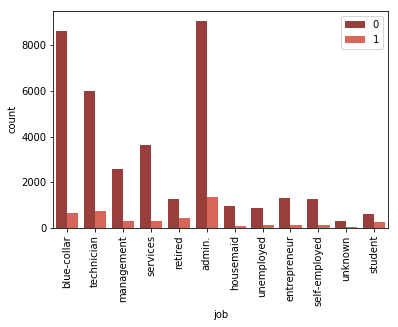

Column name: marital


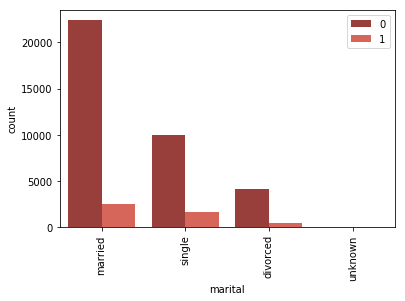

Column name: education


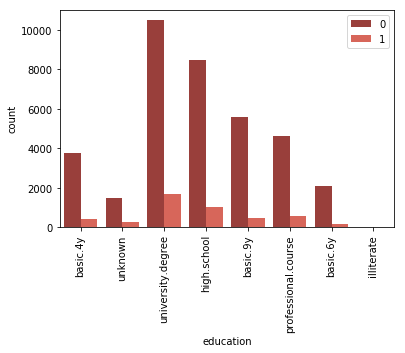

Column name: default


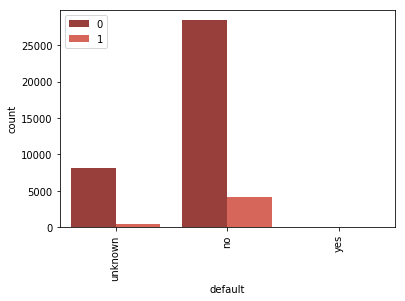

Column name: housing


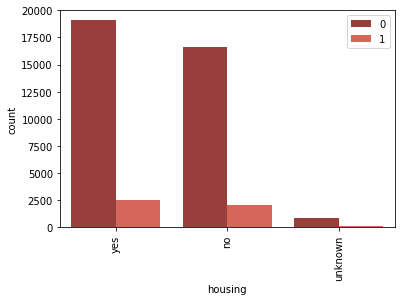

Column name: loan


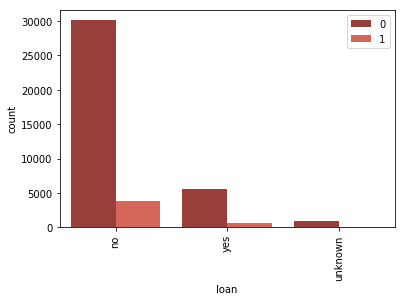

Column name: contact


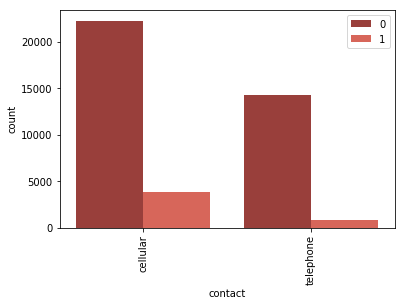

Column name: month


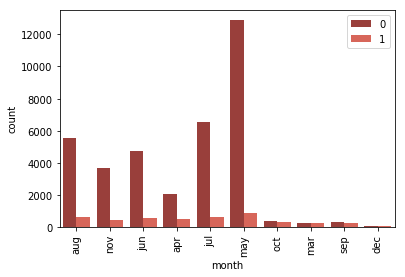

Column name: day_of_week


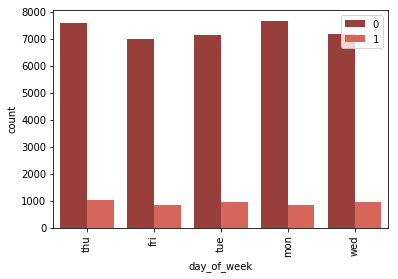

Column name: poutcome


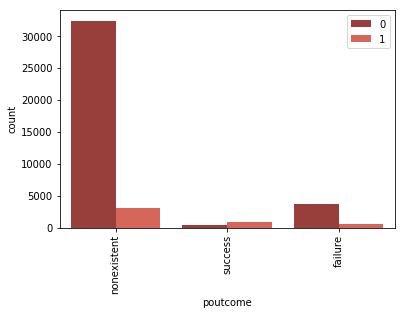

In [20]:
plot_categorical(cate_cols,'y',df)

## continous


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

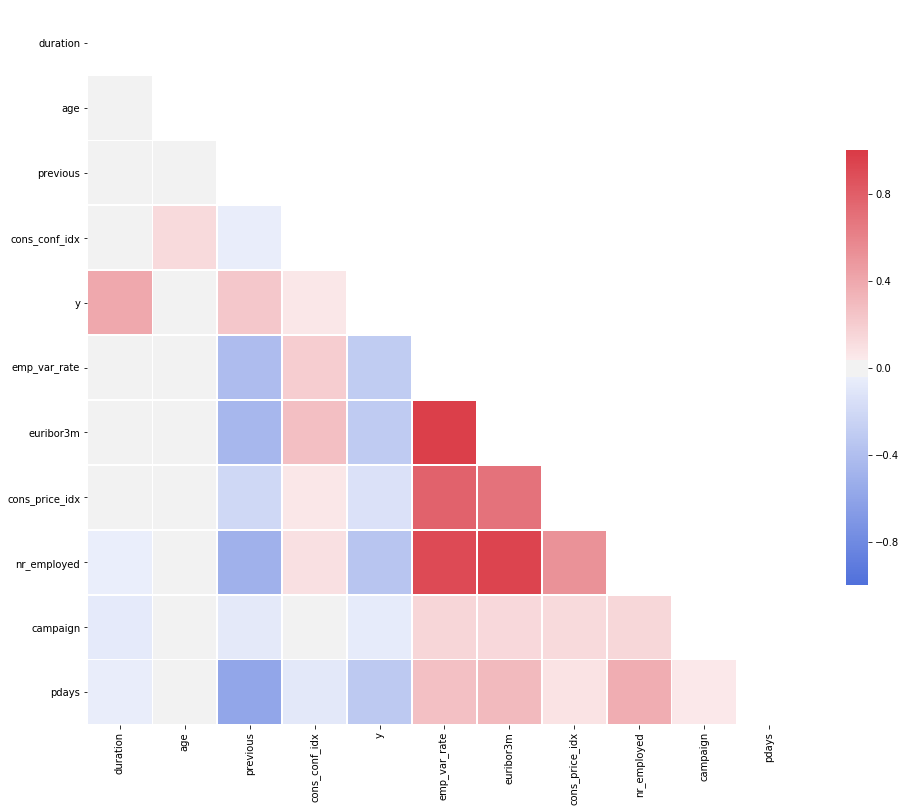

In [21]:
correlations = df[cons_cols].corr()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#correlations

Column name: duration
> No.outliner: 2963 



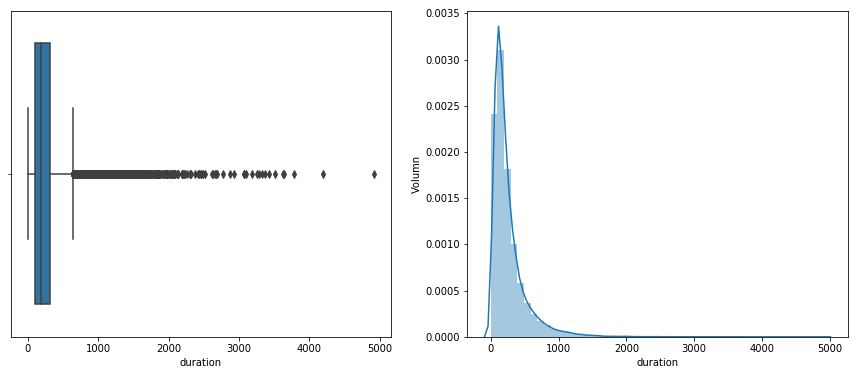

Column name: age
> No.outliner: 469 



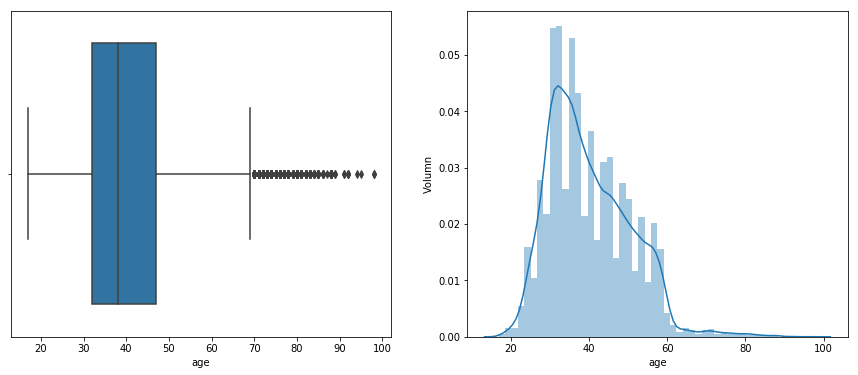

Column name: previous
> No.outliner: 5625 



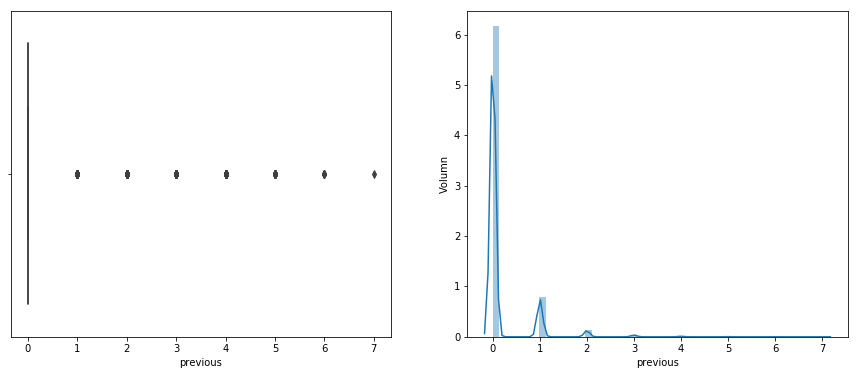

Column name: cons_conf_idx
> No.outliner: 447 



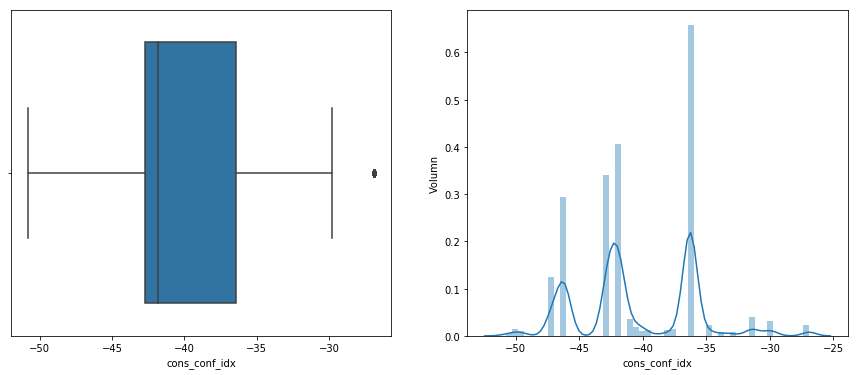

Column name: y
> No.outliner: 4640 



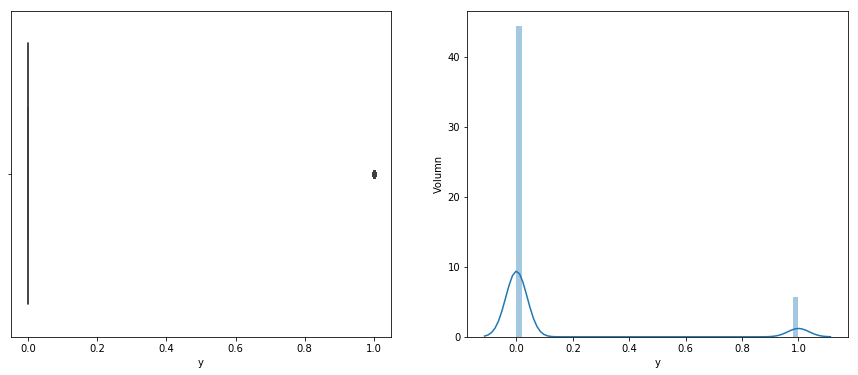

Column name: emp_var_rate
> No.outliner: 0 



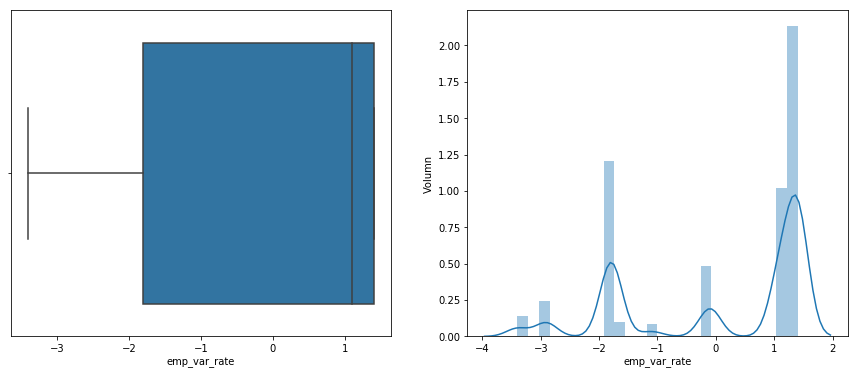

Column name: euribor3m
> No.outliner: 0 



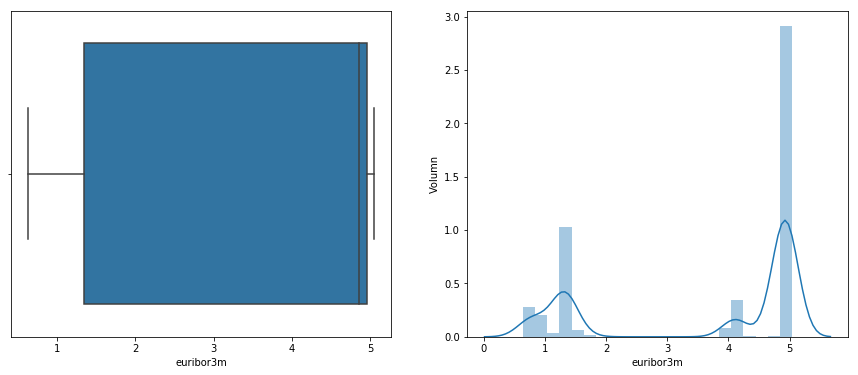

Column name: cons_price_idx
> No.outliner: 0 



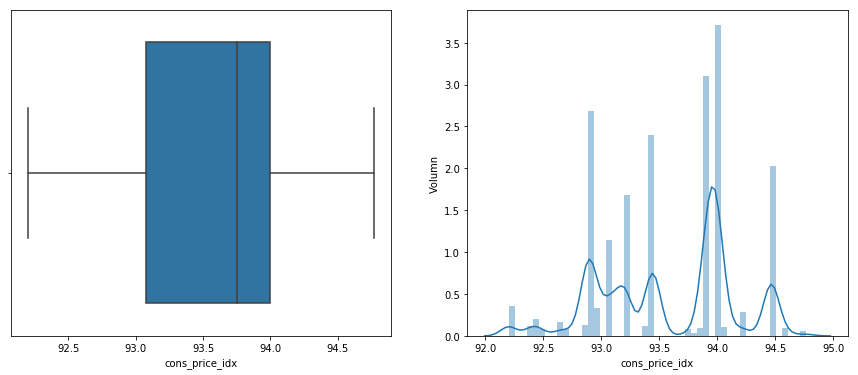

Column name: nr_employed
> No.outliner: 0 



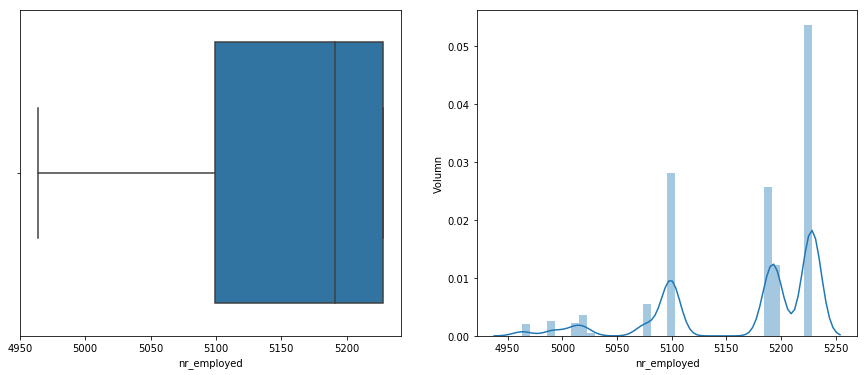

Column name: campaign
> No.outliner: 2406 



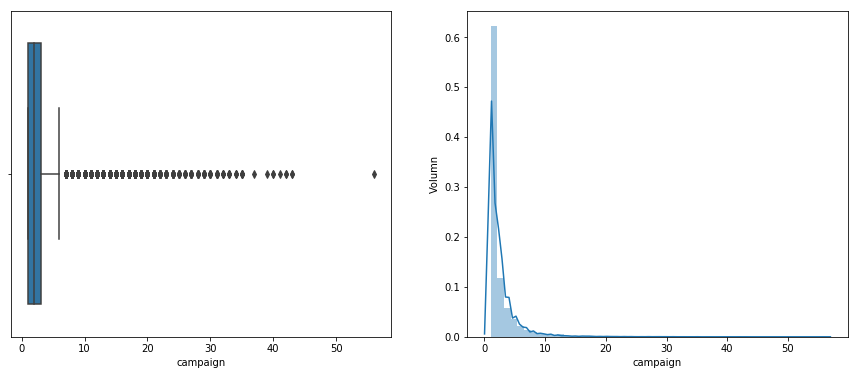

Column name: pdays
> No.outliner: 1515 



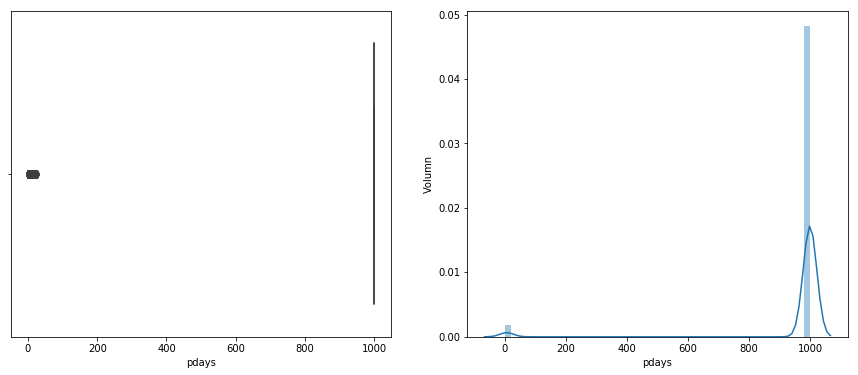

In [23]:
plot_continous(cons_cols, None, df)

## dt processing


In [0]:
df.drop(['duration'],axis=1,inplace=True)
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

# Pre Processing

Using sklearn `LabelEncoder` encoding the levels of a categorical features into numeric values. `LabelEncoder` encode labels with value between 0 and n_classes-1


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection

In [0]:
le = preprocessing.LabelEncoder()

In [75]:
for col in cate_cols:
  print(col)
  df[col] = le.fit_transform(df[col])

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


In [76]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,5,0,0,0,0,7,0,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,4,0,2,0,0,4,2,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,1,0,0,0,0,0,0,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


## Slipt train and test set


In [77]:
df.shape

(41188, 20)

In [78]:
X = df.iloc[:,0:19]
X[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,1,2,0,0,1,2,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,5,0,0,0,0,7,0,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,4,0,2,0,0,4,2,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,1,0,0,0,0,0,0,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,0,2,0,0,1,0,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2
5,30,4,0,0,0,2,0,0,3,3,8,999,0,1,1.4,93.918,-42.7,4.961,5228.1
6,37,1,1,0,0,2,0,0,6,2,1,999,0,1,-1.8,92.893,-46.2,1.327,5099.1
7,39,1,0,0,0,2,0,0,6,0,1,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
8,36,0,1,4,0,0,0,0,4,1,1,3,1,2,-2.9,92.963,-40.8,1.266,5076.2
9,27,1,2,0,0,2,0,0,0,2,2,999,1,0,-1.8,93.075,-47.1,1.410,5099.1


In [79]:
y = df.iloc[:,19:20]
y[0:10]

,y
0,0
1,0
2,1
3,0
4,1
5,0
6,0
7,0
8,1
9,0


In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
x_train.shape, y_train.shape

((32950, 19), (32950, 1))

In [82]:
x_test.shape, y_test.shape

((8238, 19), (8238, 1))

# Modeling



## 1layer- activation = 'tanh'

In [44]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(10, input_dim=19, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
#print(x_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)



In [86]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
32950/32950 [==============================] - 1s 19us/step - loss: 0.3558 - acc: 0.8869
Epoch 2/10
32950/32950 [==============================] - 0s 11us/step - loss: 0.3530 - acc: 0.8869
Epoch 3/10
32950/32950 [==============================] - 0s 12us/step - loss: 0.3531 - acc: 0.8869
Epoch 4/10
32950/32950 [==============================] - 0s 11us/step - loss: 0.3530 - acc: 0.8869
Epoch 5/10
32950/32950 [==============================] - 0s 10us/step - loss: 0.3531 - acc: 0.8869
Epoch 6/10
32950/32950 [==============================] - 0s 10us/step - loss: 0.3531 - acc: 0.8869
Epoch 7/10
32950/32950 [==============================] - 0s 10us/step - loss: 0.3531 - acc: 0.8869
Epoch 8/10
32950/32950 [==============================] - 0s 10us/step - loss: 0.3530 - acc: 0.8869
Epoch 9/10
32950/32950 [==============================] - 0s 11us/step - loss: 0.3531 - acc: 0.8869
Epoch 10/10
32950/32950 [==============================] - 0s 10us/step - loss: 0.3530 - acc: 0.8869

In [87]:
scores = model.evaluate(np.array(x_test), np.array(y_test))

8238/8238 [==============================] - 0s 25us/step


In [88]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 88.92%


In [0]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5,1,0) #(y_pred>0.5)


In [63]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7325    0]
 [ 913    0]]


## 2 layers


In [0]:
model2 = Sequential()
model2.add(Dense(10, input_dim=20, activation='tanh'))

model2.add(Dense(1, activation='sigmoid'))